In [25]:
import pandas as pd 
import seaborn  as sns 
import numpy as np  
import matplotlib.pyplot as plt 

In [26]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [27]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [29]:
if'SalePrice' not in df2.columns:
    df2['SalePrice'] = 0

df = pd.concat([df1 , df2] , axis = 0)
df = df.set_index('Id')

In [30]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [32]:
df.isna().sum()>0

MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

In [33]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

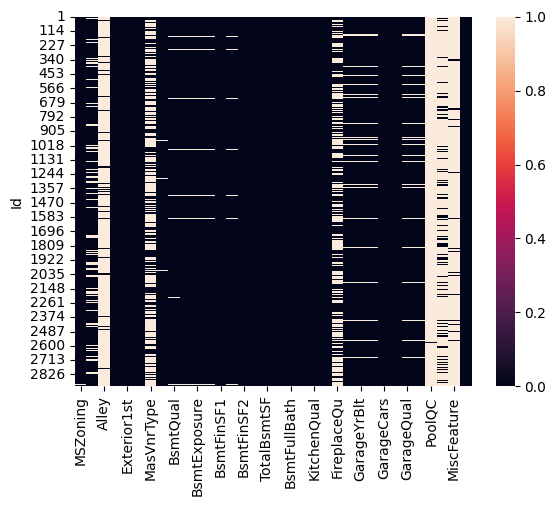

In [34]:
sns.heatmap(df_null.isnull()) 
#blank spaces are null values in columns 

In [35]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()>1100].index], axis = 1)

In [36]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum()>1100].index], axis = 1)

df_objects.head()

#this dataframe contains only value that have null values 

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [37]:
df_objects = df_objects.fillna('null')
#filling all null by a value named "null"

df_objects_encoded = pd.get_dummies(df_objects)



In [38]:
df_objects['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
null          4
Name: count, dtype: int64

In [39]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [40]:
for i in df_objects_encoded.columns:
    if 'null' in i :
        df_objects_encoded = df_objects_encoded.drop(i , axis = 1)
        print (i)



#dropping all columns  containing "null" in their column  name 

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [41]:
new_df = pd.concat([df , df_objects_encoded], axis = 1)

#creating a new DATAFRAME  

In [42]:
len(new_df.columns)

304

In [43]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [44]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

#we only want those columns that not include "object" in their name 
#so we accessesed 


new_df.isna().sum()[new_df.isna().sum()>0]
#columns that contains numeric values 

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [45]:
Mode_columns =['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']


Mean_columns=['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' ,
              'TotalBsmtSF','GarageArea'] 

for i in Mode_columns:
    if i in new_df.columns:
        new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    if i in new_df.columns:
        new_df[i] = new_df[i].fillna(round(new_df[i].mean()))




In [46]:
#spliting new DATAFRAME into test and traing datasets

training_data = new_df[0:len(df1)]
testing_data = new_df[len(df1):]



testing_data=testing_data.drop(columns='SalePrice') #we dont need salesprice column so we drop it 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from  xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B111F8D5-6AC6-3245-A6B5-94693F6992AB> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
x = training_data.drop(columns='SalePrice') #accessing data in 'x' label 
y = training_data['SalePrice']      #storing it in 'y' label
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #0.2 means we are getting only 20% of entire data


#x_train contains 80% of x  , 20% goes to x_test
#y_train contains 80% of y  , 20% goes to y_test

y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

x_train.shape , y_train.shape

((1168, 266), (1168, 1))

In [ ]:
model_1 = LinearRegression()
model_1.fit(x,y)

y_pred = model_1.predict(x_test)
mean_squared_error(y_test , y_pred)


450217308.72554266

In [ ]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, random_state=42)
model_2.fit(x, y)
y_pred_2 = model_2.predict(x_test)
mean_squared_error(y_test, y_pred_2)

15155979.0

In [ ]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(x,y)
y_pred_3 = model_3.predict(x_test)
mean_squared_error(y_test, y_pred_3)

88311833.03926885

In [ ]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred 

#writing dataframe into a csv file  without index 

final.to_csv('output1.csv', index=False)

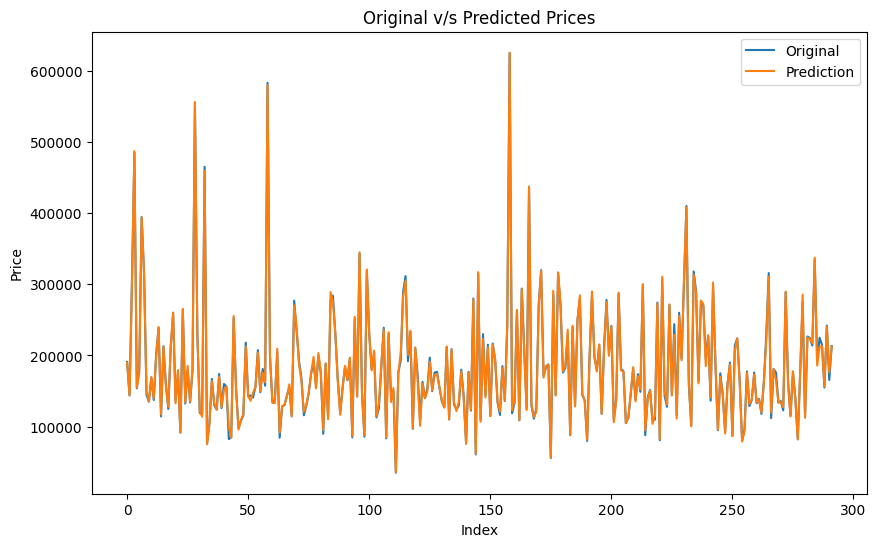

In [ ]:
sort_indices = np.argsort(y_test)


#plot
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)), y_test , label='Original')
plt.plot(np.arange(len(y_test)), y_pred_2 , label='Prediction')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original v/s Predicted Prices')
plt.legend()
plt.show()




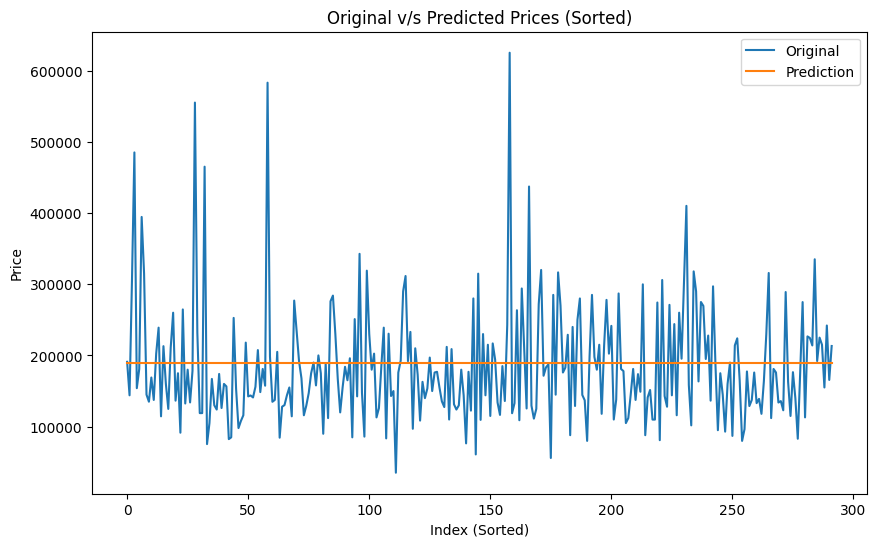

In [ ]:
# plot 2 
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)), y_test, label='Original')
plt.plot(np.arange(len(y_test)), y_pred_2[sort_indices], label='Prediction')
plt.xlabel('Index (Sorted)')
plt.ylabel('Price')
plt.title('Original v/s Predicted Prices (Sorted)')
plt.legend()
plt.show()
